In [89]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
data = pd.read_csv("./articulos_ml.csv")
print(data.shape)
data.head()

(161, 8)


,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [85]:
print(data.describe())
print(data.columns)

        Word count  # of Links  # of comments  # Images video  Elapsed days  \
count   161.000000  161.000000     129.000000      161.000000    161.000000   
mean   1808.260870    9.739130       8.782946        3.670807     98.124224   
std    1141.919385   47.271625      13.142822        3.418290    114.337535   
min     250.000000    0.000000       0.000000        1.000000      1.000000   
25%     990.000000    3.000000       2.000000        1.000000     31.000000   
50%    1674.000000    5.000000       6.000000        3.000000     62.000000   
75%    2369.000000    7.000000      12.000000        5.000000    124.000000   
max    8401.000000  600.000000     104.000000       22.000000   1002.000000   

            # Shares  
count     161.000000  
mean    27948.347826  
std     43408.006839  
min         0.000000  
25%      2800.000000  
50%     16458.000000  
75%     35691.000000  
max    350000.000000  
Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Ima

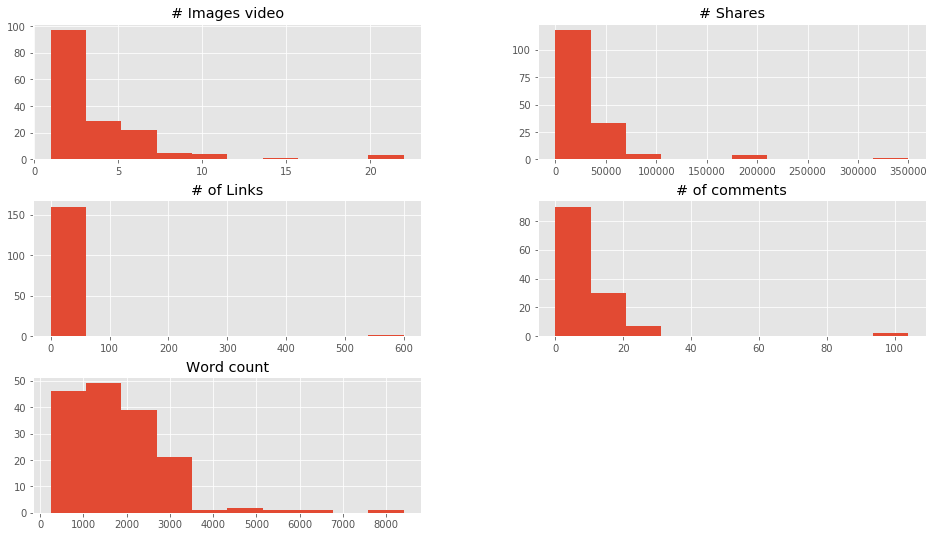

In [86]:
# Visualizamos las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

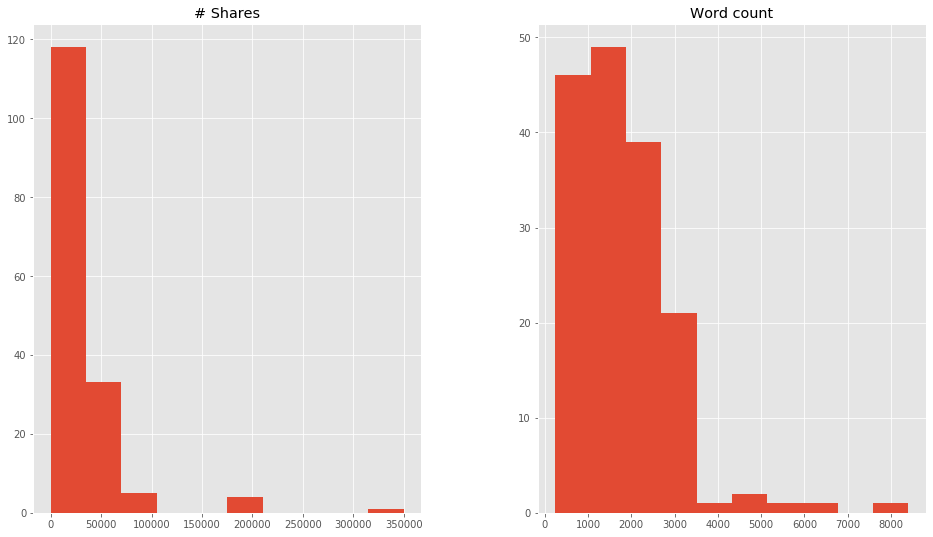

In [88]:
data[['# Shares', 'Word count']].hist()
plt.show()

#### Vamos a filtrar los datos de cantidad de palabras para quedarnos con los registros con menos de 3500 palabras y también con los que tengan Cantidad de compartidos menos a 80.000. Lo gratificaremos pintando en azul los puntos con menos de 1808 palabras (la media) y en naranja los que tengan más.

[1742  962  761  753 1118 1581  256 1267  971  369  635 1631  571 1333
  364  515 1135  666  787  421 1065  908 1260  950 1761  911  971  458
  458  782 2080  250 1763  650 1184  957  627  895 1097 1262 1738 1813
 2400  662  800  367  507  992  499  619 1152 2363  988  759 1098 2797
 1120 2488 2049 2542 1011 2189 1864  990 1741 1229 2975 1864 2460 2136
 2833 1995 2332 1998 3442 2696 1913 1858 2457 2592 1718 1293 3023 3485
 2093 1490 1238 2583 1007  978 3019 2347 2224 1778 1150 2528 2486 2317
 2369 1612 1136 2721 3480 1143 2428 2877  776 1284 1145 1793 2904 1473
 2894 1932 3225 3185 2068 2354 2921 2211 2865 1674 2282 2636  774 1030
  734  743 1514 2854 1443 1817 1266 2275 1264 2212 1871 2513 1443  912
 2366 1542 1201 3239 2566 2089 1530  953]


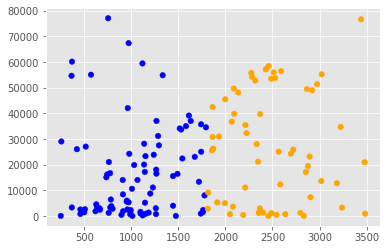

In [20]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

### Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos «encajar» (entrenar) con el método fit(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [22]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


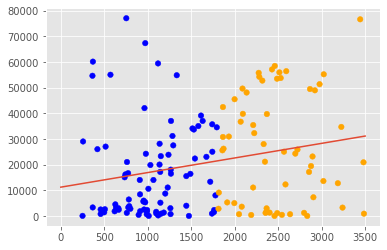

In [53]:
Xc = np.arange(0, 3500, 1)
Yc = 5.69 * Xc + 11200
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.plot(Yc)
plt.show()

## Predicción en regresión lineal simple
#### Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos «compartir» obtendrá un articulo sobre ML de 2000 palabras

In [23]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


## Regresión Lineal Múltiple en Python

#### Vamos a extender el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pues de esta manera podremos obtener predicciones más complejas. Nuestra «ecuación de la Recta», ahora pasa a ser:
#### Y = b + m1 X1 + m2 X2 + … + m(n) X(n).......    y deja de ser una recta)

In [28]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values
#Ya tenemos nuestras 2 variables de entrada en XY_train y nuestra variable de salida pasa de ser «Y» a ser el eje «Z».

1      18.0
2       7.0
5       1.0
7       4.0
8       3.0
       ... 
156    15.0
157    15.0
158     9.0
159    19.0
160    21.0
Length: 148, dtype: float64

### Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al igual que antes, imprimimos los coeficientes y puntajes obtenidos:

In [29]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


## Visualizar un plano en 3 Dimensiones en Python

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

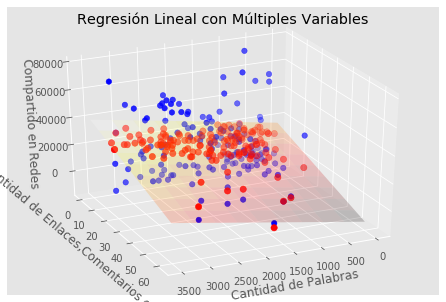

In [30]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

# Predicción con el modelo de Mútiples Variables

In [31]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


In [66]:
import numpy as np
import pandas as pd
Timestamp = pd.Timestamp
nan = np.nan
NaT = pd.NaT
df1 = pd.DataFrame({
    'col1': list('ac'),
    'col2': ['b', nan],
    'date': (Timestamp('2014-08-14'), NaT)
    })
df1

,col1,col2,date
0,a,b,2014-08-14
1,c,NaN,NaT


In [81]:
u=np.where(df1.date.isnull())
u[0]

array([1], dtype=int64)

In [65]:
df1['date'] = df1['date'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '0')
df1

,col1,col2,date
0,a,b,2014-08-14
1,c,NaN,0
